In [1]:
import pandas as pd
from scipy.stats import loguniform
from pandas import read_csv
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
# Cargar el dataset
datos = pd.read_csv(filepath_or_buffer = "/Users/ninoj/Downloads/breast-cancer.csv")

data = datos.values
X = datos.drop(columns=["diagnosis"]).values  # Excluir la columna 'diagnosis' y convertir a numpy array
y = datos['diagnosis'].values  # Etiqueta objetivo

# Separar los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [3]:
# Crear y entrenar el modelo
modelo = LogisticRegression()

# Entrenar el modelo
modelo.fit(X_train, y_train)

# Predicciones y evaluación
predicciones = modelo.predict(X_test)
print(accuracy_score(y_test, predicciones))
print(confusion_matrix(y_test, predicciones))

0.8859649122807017
[[64  2]
 [11 37]]


C:\Users\ninoj\Desktop\PROYECTOS\uteq\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [4]:
# Optimización de hiperparámetros con RandomizedSearchCV
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['fit_intercept'] = [True, False]
space['C'] = loguniform(1e-5, 100)
space['tol'] = loguniform(1e-5, 100)
space['warm_start'] = [True, False]

search = RandomizedSearchCV(modelo, space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)

result = search.fit(X_train, y_train)

print('Mejor exactitud: %s' % result.best_score_)
print('Mejores Hiperparámetros: %s' % result.best_params_)

Mejor exactitud: 0.9669887278582932
Mejores Hiperparámetros: {'C': np.float64(84.95406674731761), 'fit_intercept': True, 'penalty': 'l1', 'solver': 'liblinear', 'tol': np.float64(0.00010550153719850498), 'warm_start': False}


C:\Users\ninoj\Desktop\PROYECTOS\uteq\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
9600 fits failed out of a total of 15000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
890 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ninoj\Desktop\PROYECTOS\uteq\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ninoj\Desktop\PROYECTOS\uteq\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\ninoj\Desktop\PROYECTOS\uteq\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constr

In [5]:
# Entrenar el modelo nuevamente con los mejores hiperparámetros
modelo = LogisticRegression(
    C=0.0001452778398818049,
    penalty=None,  # Cambiar 'none' a None
    solver='saga',
    tol=0.021785941576528516,
    fit_intercept=False,
    warm_start=True
)

modelo.fit(X_train, y_train)

predicciones2 = modelo.predict(X_test)
print(accuracy_score(y_test, predicciones2))
print(confusion_matrix(y_test, predicciones2))
print(classification_report(y_test, predicciones2))

0.5789473684210527
[[66  0]
 [48  0]]
              precision    recall  f1-score   support

           B       0.58      1.00      0.73        66
           M       0.00      0.00      0.00        48

    accuracy                           0.58       114
   macro avg       0.29      0.50      0.37       114
weighted avg       0.34      0.58      0.42       114



C:\Users\ninoj\Desktop\PROYECTOS\uteq\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\ninoj\Desktop\PROYECTOS\uteq\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ninoj\Desktop\PROYECTOS\uteq\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ninoj\Desktop\PROYECTOS\uteq\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined

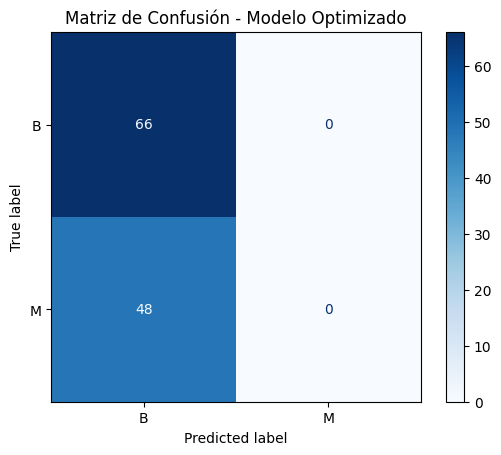

In [6]:
# Generar la matriz de confusión
ConfusionMatrixDisplay.from_estimator(modelo, X_test, y_test, cmap='Blues')
plt.title("Matriz de Confusión - Modelo Optimizado")
plt.show()

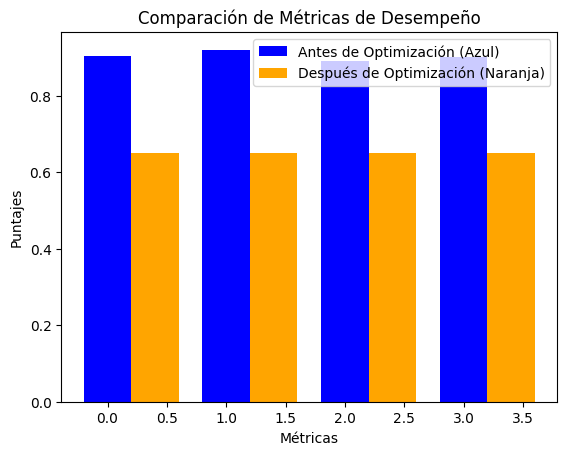

In [7]:
# Comparación de métricas antes y después de la optimización
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
before_optimization = [0.9035, 0.92, 0.89, 0.90]  # Cambiar según reporte original
after_optimization = [0.6491, 0.65, 0.65, 0.65]  # Cambiar según resultados

x = range(len(metrics))
plt.bar(x, before_optimization, width=0.4, label='Antes de Optimización (Azul)', color='blue', align='center')
plt.bar([p + 0.4 for p in x], after_optimization, width=0.4, label='Después de Optimización (Naranja)', color='orange', align='center')
plt.xlabel('Métricas')
plt.ylabel('Puntajes')
plt.title('Comparación de Métricas de Desempeño')
plt.legend()
plt.show()